---
title: "Modul 2 Sains Data: Eksplorasi, Visualisasi, dan Preprocessing Data"
subtitle: "Visualisasi Data dengan Matplotlib & Seaborn, Encoding Data Kategorik, Imputasi Missing Values"
image: static\seaborn.png
description: "Offline di Departemen Matematika"
date: 10/03/2025
page-navigation: true
format: html
---

Kembali ke [Sains Data](./saindat2024genap.qmd)

Pada modul ini kita akan mempelajari beberapa cara untuk membuat visualisasi data menggunakan package Matplotlib dan Seaborn. Seaborn merupakan salah satu package visualisasi data yang sangat sering digunakan karena fleksibilitas dan banyaknya jenis plot yang disediakan. Setelah itu akan dikenalkan metode-metode pada preprocessing seperti encoding data kategorik, imputasi missing values, dan mengatasi dataset unbalanced dengan teknik resampling.

# Explorasi dan Visualisasi Data

## Prerequisites

### Import Module

Sebelum memulai, mari kita import terlebih dahulu module - module yang diperlukan.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

Pada module kali ini, akan digunakan tiga data csv yang berbeda untuk mempermudah kebutuhan visualisasi, yaitu:

1. Spotify Dataset (`spotify.csv`), bisa di-*download* dari

    * [Direct link (langsung dari GitHub Pages ini)](spotify.csv)

    * [Kaggle](https://www.kaggle.com/code/alexisbcook/hello-seaborn/data?select=spotify.csv)

    * Google Drive: <https://bit.ly/DataWeek2> atau [langsung](https://drive.google.com/drive/folders/1W3jW1Tt8jfBFK8KfQYul179lfynd3B7A)

2. Flight Delays Dataset (`flight_delays.csv`), bisa di-*download* dari

    * [Direct link (langsung dari GitHub Pages ini)](flight_delays.csv)

    * [Kaggle](https://www.kaggle.com/code/alexisbcook/hello-seaborn/data?select=flight_delays.csv)

    * Google Drive: <https://bit.ly/DataWeek2> atau [langsung](https://drive.google.com/drive/folders/1W3jW1Tt8jfBFK8KfQYul179lfynd3B7A)

3. Insurance Dataset (`insurance.csv`), bisa di-*download* dari

    * [Direct link (langsung dari GitHub Pages ini)](insurance.csv)

    * [Kaggle](https://www.kaggle.com/code/alexisbcook/hello-seaborn/data?select=insurance.csv)

    * Google Drive: <https://bit.ly/DataWeek2> atau [langsung](https://drive.google.com/drive/folders/1W3jW1Tt8jfBFK8KfQYul179lfynd3B7A)

atau langsung *download* ketiganya sekaligus, bisa dari:

* Google Drive: <https://bit.ly/DataWeek2> atau [langsung](https://drive.google.com/drive/folders/1W3jW1Tt8jfBFK8KfQYul179lfynd3B7A)

Kemudian, baca tiap CSV sebagai dataframe:

In [36]:
spotify_df = pd.read_csv("./spotify.csv",
                         index_col='Date',
                         parse_dates=['Date'])
flight_df = pd.read_csv("./flight_delays.csv")
insurance_df = pd.read_csv("./insurance.csv")

## Review Matplotlib

Seperti yang sudah dipelajari pada Algoritma dan Pemrograman, visualisasi data dapat dilakukan dengan module matplotlib, antara lain untuk membuat line plot dan scatter plot.

Pertama, kita akan menggunakan data Spotify, yaitu data total daily streams 5 lagu hits pada masanya.

In [37]:
spotify_df

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0


Catatan:

* Shape of You dirilis tanggal 6 Januari 2017.
* Despacito dirilis tanggal 13 Januari 2017.
* Something Just Like This dirilis tanggal 22 Februari 2017.
* HUMBLE. dirilis tanggal 30 Maret 2017.
* Unforgettable dirilis tanggal 7 April 2017.

Perhatikan bahwa ada beberapa data NaN (*not a number*), artinya tidak ada data (*missing data*).

In [38]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2017-01-06 to 2018-01-09
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Shape of You              366 non-null    int64  
 1   Despacito                 359 non-null    float64
 2   Something Just Like This  319 non-null    float64
 3   HUMBLE.                   282 non-null    float64
 4   Unforgettable             275 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 17.2 KB


In [39]:
spotify_df.isna()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,False,True,True,True,True
2017-01-07,False,True,True,True,True
2017-01-08,False,True,True,True,True
2017-01-09,False,True,True,True,True
2017-01-10,False,True,True,True,True
...,...,...,...,...,...
2018-01-05,False,False,False,False,False
2018-01-06,False,False,False,False,False
2018-01-07,False,False,False,False,False


In [40]:
spotify_df.isna().sum()

Shape of You                 0
Despacito                    7
Something Just Like This    47
HUMBLE.                     84
Unforgettable               91
dtype: int64

Cara menangani *missing values* tergantung konteks. Di sini, lagu-lagu dengan data NaN pada tanggal tertentu memang belum dirilis.

* Untuk analisis *trend* tiap lagu sejak dirilis, sebaiknya data NaN dibiarkan saja.
* Untuk analisis frekuensi *streaming*, data NaN bisa diganti jadi nol. (Hati-hati, jangan sampai nantinya lupa dan malah terpikir "kok bisa ya lagu ini ga didengerin sama sekali")
* Apabila semua lagu ingin dibandingkan datanya di masa sudah rilis semua, sebaiknya baris-baris dengan data NaN itu dihapus.

Kali ini, kita akan memperhatikan *trend* tiap lagu, sehingga data NaN kita biarkan saja.

Berikut adalah cara untuk membuat line plot pada satu fitur di dataframe menggunakan matplotlib

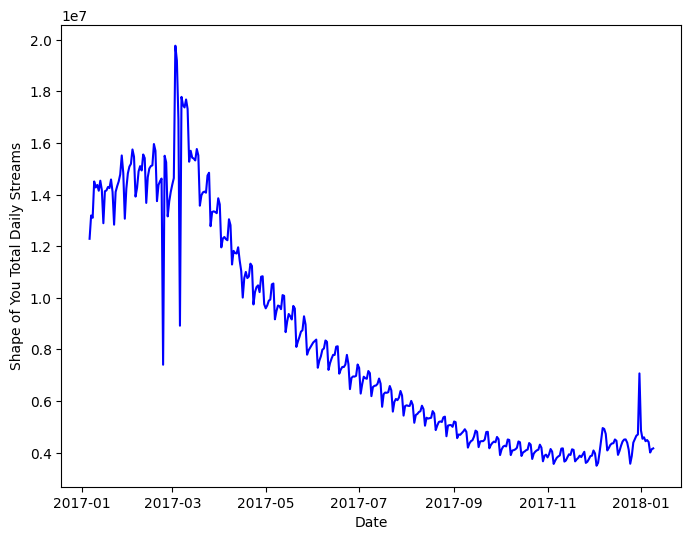

In [41]:
"""
Membuat line plot untuk lagu Shape of You menggunakan matplotlib
"""

# Mengatur besar figur plot
plt.subplots(figsize=(8,6))

# Membuat line plot
plt.plot(spotify_df['Shape of You'], 'b')
# Membuat label sumbu-x dan sumbu-y
plt.xlabel('Date')
plt.ylabel('Shape of You Total Daily Streams')
# Menampilkan plot
plt.show()

Apabila kita ingin menampilkan fitur-fitur lain dalam figur yang sama, kita dapat memanfaatkan loop

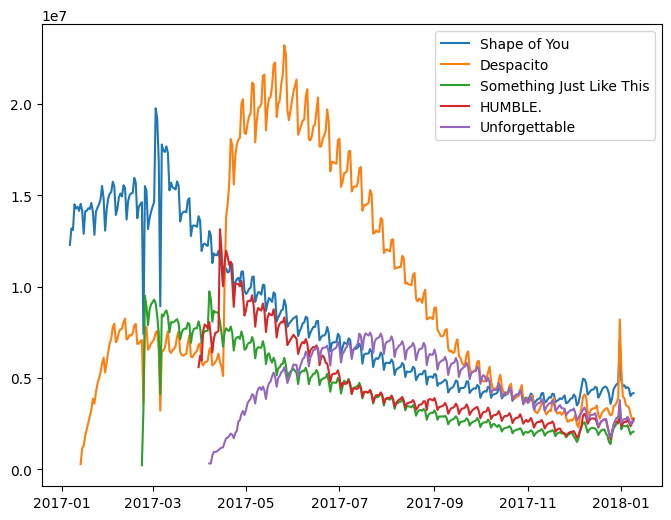

In [42]:
"""
Membuat line plot untuk semua lagu dalam spotify_df menggunakan loop
"""

plt.subplots(figsize=(8,6))

# Loop setiap nama kolom pada dataframe, lalu plot
for column in spotify_df.columns:
    plt.plot(spotify_df[column])

plt.legend(spotify_df.columns)
plt.show()

Namun, terdapat cara yang lebih mudah selain menggunakan looping. pandas dataframe memiliki method yang dapat secara langsung memvisualisasikan keseluruhan fiturnya, yaitu `.plot()`.

Pada `.plot()` kita memiliki beberapa parameter yang dapat diatur, antara lain `kind` dan `figsize`. `kind` berfungsi untuk mengatur jenis plot yang ingin kita buat, sedangkan `figsize` berfungsi untuk mengatur besar figur yang dihasilkan.

Parameter lainnya dapat dilihat pada:

<https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html>

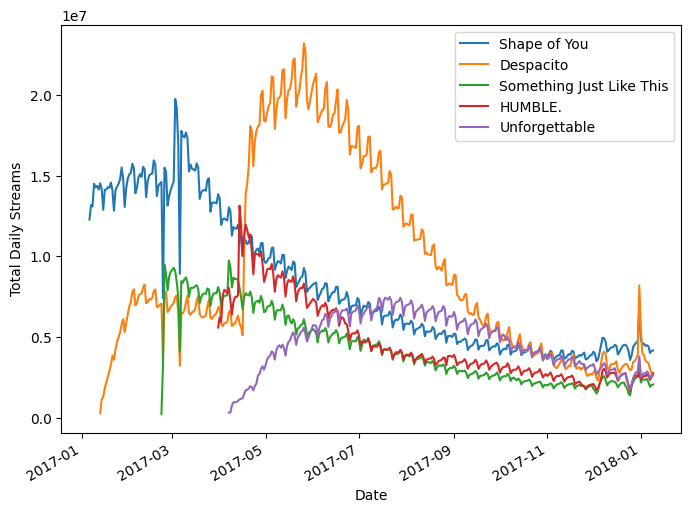

In [43]:
"""
Membuat line plot untuk semua lagu dalam spotify_df menggunakan pandas .plot()
"""

spotify_df.plot(kind='line', figsize=(8,6))
plt.xlabel('Date')
plt.ylabel('Total Daily Streams')
plt.show()

Selain line plot, terdapat banyak macam `kind` yang bisa digunakan. Pada code cell dibawah terlihat bahwa pandas `.plot()` dapat menghasilkan histogram (perlu diperhatikan bahwa jenis plot perlu menyesuaikan tipe data yang dimiliki, terlihat bahwa menggunakan data spotify, histogram tidak menghasilkan insight yang cukup berguna).  

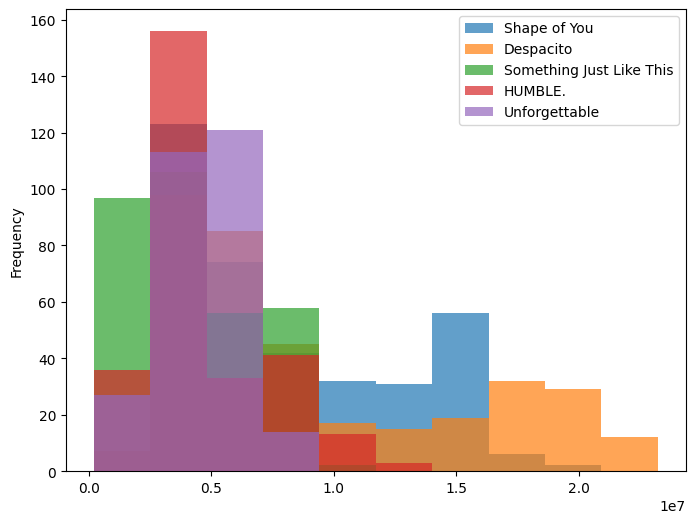

In [44]:
spotify_df.plot(kind='hist', figsize=(8,6), alpha=.7)

plt.show()

Pada praktikum Algoritma dan Pemrograman kita juga telah mempelajari cara untuk membuat scatter plot. Berikut code untuk membuat scatter plot menggunakan matplotlib, untuk melihat korelasi antara daily streams lagu Shape of You dengan Something Just Like This.

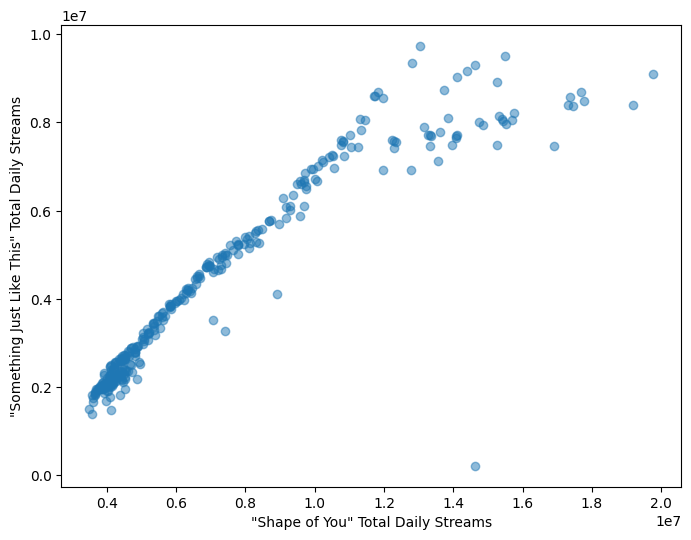

In [45]:
"""
Membuat scatter plot untuk melihat korelasi antara lagu
Shape of You dengan Something Just Like This menggunakan
matplotlib
"""

plt.subplots(figsize=(8,6))

plt.scatter(x=spotify_df['Shape of You'], 
            y=spotify_df['Something Just Like This'],
            alpha=.5)
plt.xlabel('"Shape of You" Total Daily Streams')
plt.ylabel('"Something Just Like This" Total Daily Streams')
plt.show()

## Pengenalan Seaborn

Walaupun matplotlib cukup fleksibel dalam menghasilkan plot, tetapi tipe plot yang disediakan cenderung terbatas. Oleh karena itu, kita dapat menggunakan Seaborn karena tipe plot yang disediakan sangat banyak sesuai kebutuhan kita, antara lain line, bar, heatmap, scatter, box, swarm, histogram, density, dan masih banyak lagi.

### Line Plot

Line plot biasa digunakan untuk melihat trend data dalam jangka waktu tertentu.

Untuk membuat line plot pada seaborn, kita dapat menggunakan `sns.lineplot()`. Jika data yang ingin kita visualisasikan adalah dataframe, kita dapat memasukkan variabel dataframe tersebut pada parameter `data`, seperti code di bawah ini.

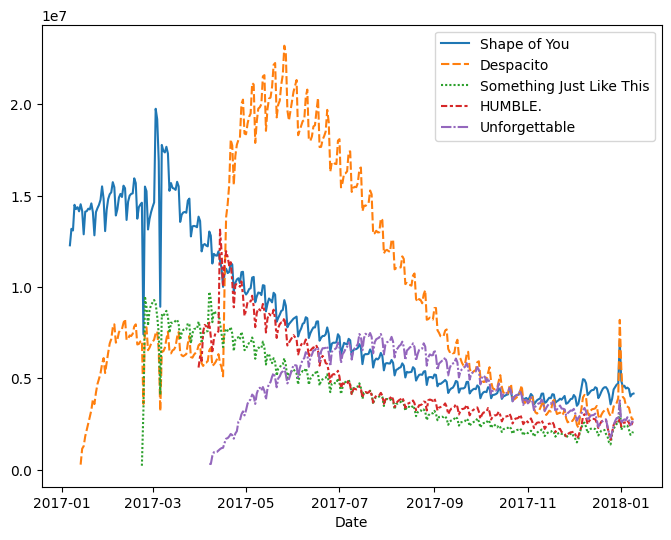

In [46]:
"""
Membuat line plot dengan module seaborn
"""

plt.subplots(figsize=(8,6))
sns.lineplot(data=spotify_df)
plt.show()

Fleksibilitas Seaborn membuat kita dapat memilih color palette yang sesuai dengan keinginan kita. Kita dapat memilih palette yang sudah disediakan oleh seaborn (antara lain: bright, deep, pastel, dan masih banyak lagi) atau kita dapat mengatur sendiri palette yang ingin kita gunakan.

Untuk memilih palette yang akan digunakan untuk plot selanjutnya pada seaborn, kita dapat menggunakan `sns.set_palette()`.

Jenis palette yang disediakan seaborn serta cara membuat color palette secara mandiri dapat dilihat pada:

<https://seaborn.pydata.org/tutorial/color_palettes.html#tools-for-choosing-color-palettes>

In [47]:
# Mengganti color palette menjadi "bright"
sns.set_palette('bright')

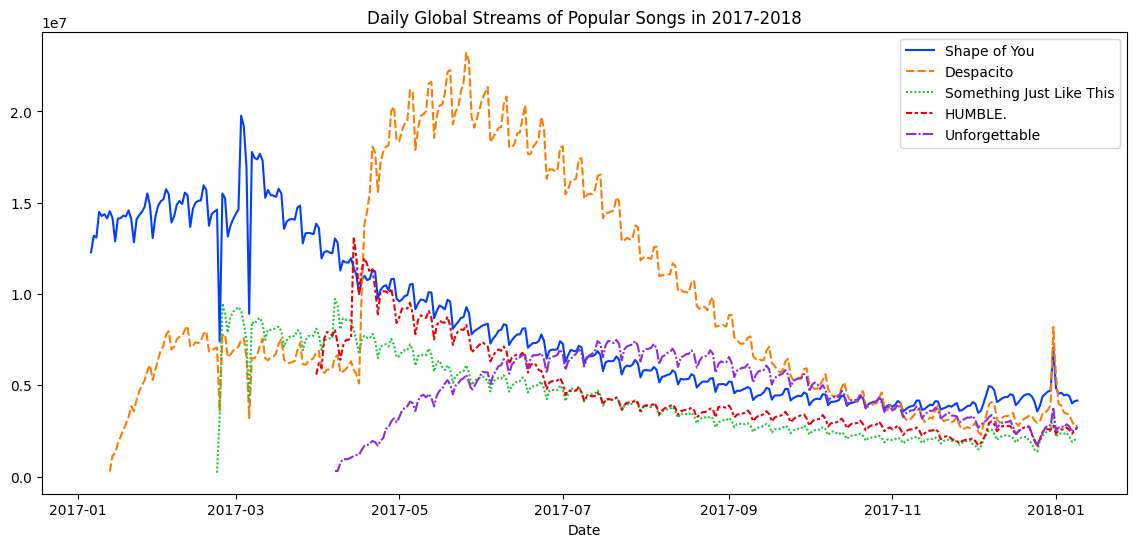

In [48]:
"""
Membuat line plot setelah color palette diubah menjadi "bright"
"""

# Mengatur besar figur yang ingin ditampilkan
plt.figure(figsize=(14,6))

# Membuat line plot
sns.lineplot(data=spotify_df)
# Membuat judul figur
plt.title("Daily Global Streams of Popular Songs in 2017-2018")
# Menampilkan plot
plt.show()

Apabila tidak semua fitur pada data ingin kita visualisasikan, kita dapat menggunakan `sns.lineplot()` beberapa kali, sesuai dengan banyaknya fitur yang ingin kita tampilkan, seperti pada code di bawah.

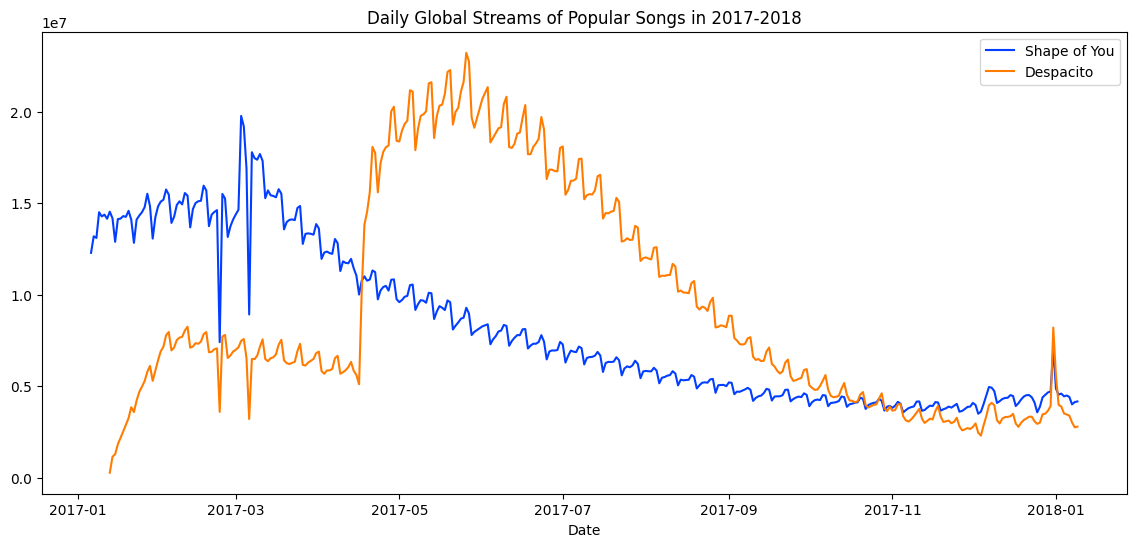

In [49]:
plt.figure(figsize=(14,6))

# Membuat line plot hanya dengan lagu Shape of You
sns.lineplot(data=spotify_df['Shape of You'], label="Shape of You")
# Menambahkan line plot pada figur dengan lagu Despacito
sns.lineplot(data=spotify_df['Despacito'], label="Despacito")

plt.title("Daily Global Streams of Popular Songs in 2017-2018")
plt.xlabel("Date")
plt.ylabel('')
plt.show()

### Bar Plot

Bar plot biasa digunakan untuk membandingkan kuantitas/nilai pada data bertipe kategori.

Selanjutnya, kita akan menggunakan data flight_delays.csv, yaitu data rata-rata keterlambatan beberapa maskapai pesawat pada setiap bulannya.

In [50]:
flight_df

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,January,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,February,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,March,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,April,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,May,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
5,June,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
6,July,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
7,August,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
8,September,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260
9,October,-0.580930,-2.993617,3.676787,-5.011516,2.303760,0.082127,0.467074,-3.735054,6.810736,1.750897,-2.456542,NaN,2.254278,-0.688851


Untuk membuat bar plot pada seaborn dengan dataframe, kita dapat menggunakan `sns.barplot()` dengan tiga parameter yang wajib kita set, yaitu:
    
- data: dataframe yang ingin kita visualisasikan

- x: nama fitur pada dataframe yang ingin kita jadikan sumbu-x
    
- y: nama fitur pada dataframe yang ingin kita jadikan sumbu-y

Pada kode di bawah, juga digunakan satu parameter opsional, yaitu `palette` yang merupakan cara lain untuk mengatur color palette yang ingin kita gunakan

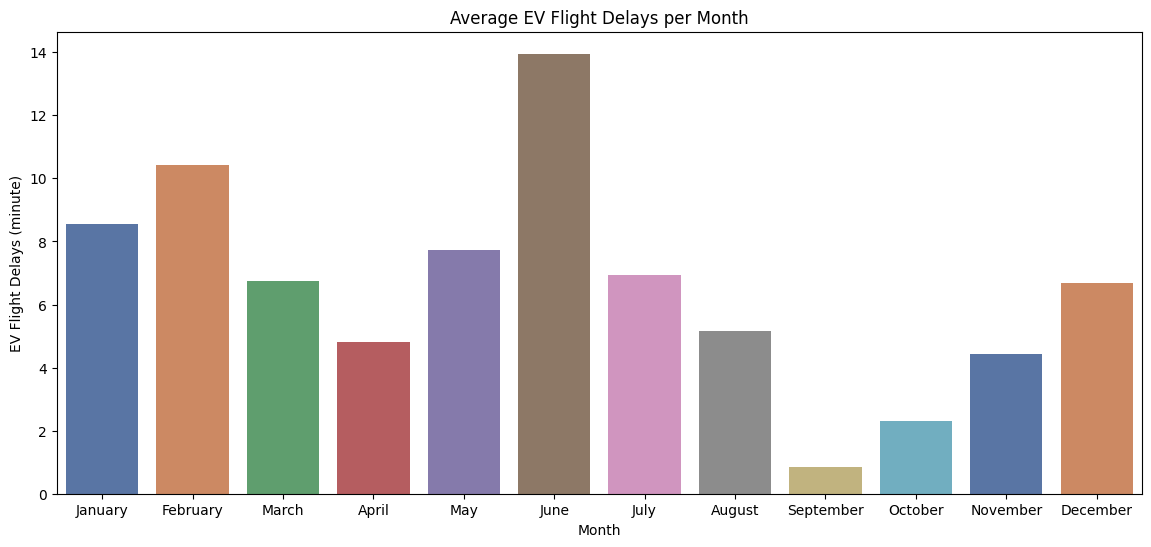

In [51]:
"""
Membuat bar plot keterlambatan maskapai EV setiap 
bulannya menggunakan seaborn
"""

plt.figure(figsize=(14,6))

sns.barplot(data=flight_df, x='Month', y='EV',hue="Month",
            palette=sns.color_palette('deep', n_colors=12))
plt.ylabel('EV Flight Delays (minute)')
plt.title('Average EV Flight Delays per Month')
plt.show()

Berdasarkan hasil plot di atas, terlihat bahwa maskapai EV memiliki rata-rata keterlambatan terlama pada bulan Juni, serta tercepat pada bulan September.

Selanjutnya, mari kita coba lihat urutan rata-rata keterlambatan semua maskapai dalam satu tahun (maskapai mana yang memiliki rata-rata keterlambatan terlama, serta maskapai mana yang tercepat).

Hal pertama yang perlu kita lakukan adalah, jadikan fitur `Month` sebagai index dataframe.

In [52]:
# Set fitur "Month" menjadi index dataframe
flight_df = flight_df.set_index('Month')
flight_df.head(2)

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
January,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
February,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363


Selanjutnya, kita perlu hitung rata-rata keterlambatan tiap maskapai dalam satu tahun, yaitu hitung rata-rata tiap kolom pada dataframe menggunakan `.mean()` (Tambahan: apabila kita ingin menghitung rata-rata tiap barisnya, kita dapat menggunakan parameter `axis=1` pada `.mean()`). `.mean()` akan menghasilkan pandas Series.

Lalu, agar mempermudah kita dalam melihat visualisasi bar plotnya, kita dapat menggunakan `.sort_values()`.

In [53]:
# Simpan rata-rata keterlambatan semua maskapai dalam satu tahun pada variabel flight_mean_inyear
flight_mean_inyear = flight_df.mean()
# Urutkan flight_mean_inyear secara ascending
flight_mean_inyear = flight_mean_inyear.sort_values()

flight_mean_inyear

AS    -1.023656
DL     0.231116
HA     1.993205
US     3.776815
AA     4.120776
WN     4.275277
VX     4.717718
UA     5.413415
OO     5.909658
MQ     5.964953
EV     6.543328
B6     6.788370
F9    13.035736
NK    14.549663
dtype: float64

Terakhir, visualisasikan bar plot menggunakan cara seperti sebelumnya.

Kita dapat lihat pada code dibawah bahwa tidak digunakan parameter `data`, karena flight_mean_inyear merupakan pandas Series (bukan dataframe) sehingga lebih mudah jika kita langsung menggunakan parameter `x` dan `y` saja.

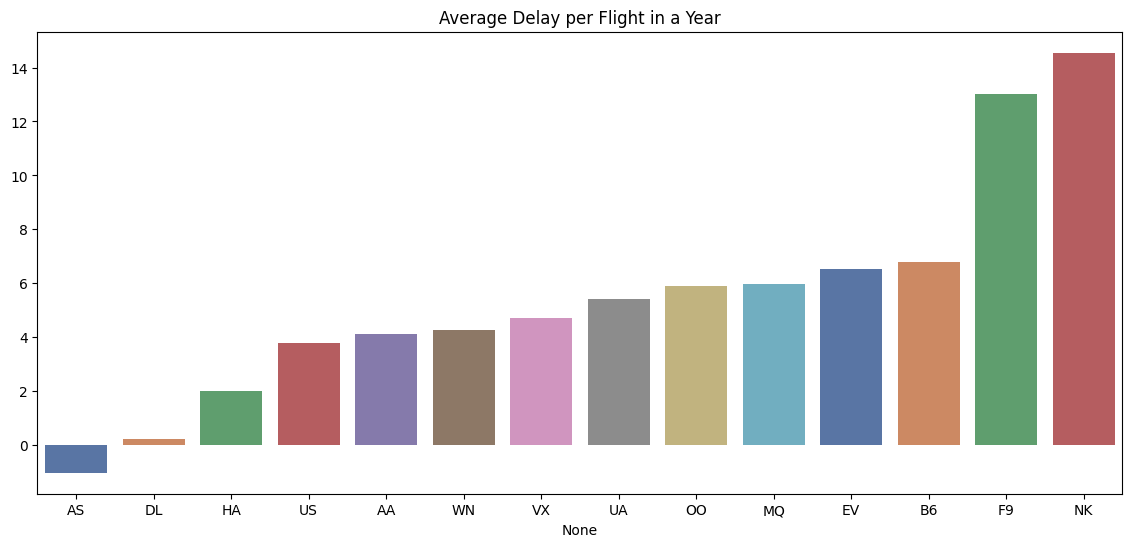

In [54]:
plt.subplots(figsize=(14,6))
sns.barplot(x=flight_mean_inyear.index, hue=flight_mean_inyear.index,
            y=flight_mean_inyear.values,
            palette=sns.color_palette('deep', n_colors=14))
plt.title('Average Delay per Flight in a Year')
plt.show()

Berdasarkan plot diatas, NK merupakan maskapai dengan rata-rata keterlambatan terlama dalam satu tahun, sedangkan AS adalah yang tercepat (AS bernilai negatif yang berarti rata-rata kedatangan pesawat lebih cepat dari yang dijadwalkan dalam satu tahun.

### Heatmap

Heatmap biasa digunakan untuk mempermudah melihat pola pada data berdasarkan warna yang dihasilkan.

Pada seaborn, kita dapat menggunakan heatmap dengan `sns.heatmap()` seperti pada kode dibawah. Parameter `annot` berfungsi untuk menampilkan nilai data (jika True) atau tidak (jika False).

Bar sebelah kanan heatmap menunjukkan bahwa, semakin lama keterlambatan pesawat, maka warna yang dihasilkan semakin terang. Sebaliknya, semakin gelap warna yang dihasilkan berarti semakin cepat pesawat datang tersebut.

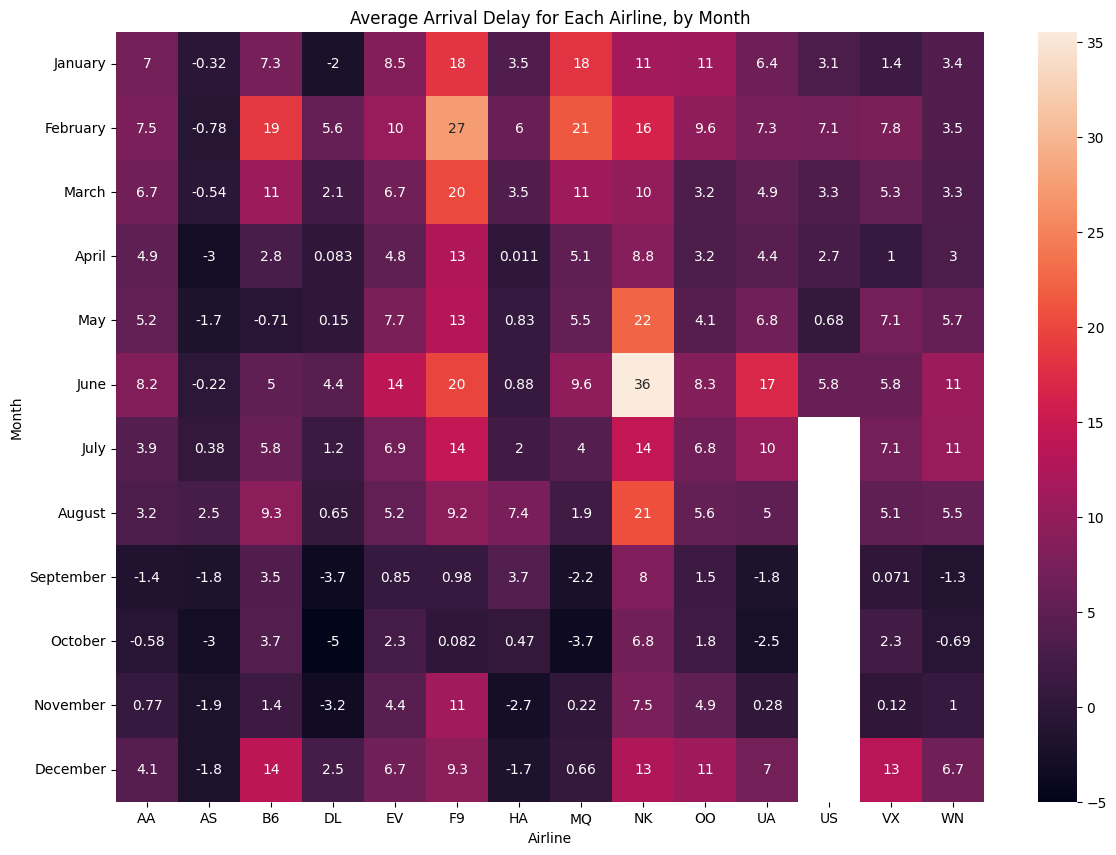

In [55]:
"""
Membuat heatmap menggunakan Seaborn
"""
plt.figure(figsize=(14,10))

sns.heatmap(data=flight_df, annot=True)
plt.title("Average Arrival Delay for Each Airline, by Month")
plt.xlabel("Airline")
plt.show()

Berdasarkan heatmap di atas, kita dapat melihat dengan mudah pada bulan apa suatu maskapai sangat terlambat (contoh: maskapai NK pada bulan Juni).

Heatmap sangat sering digunakan untuk melihat korelasi antar fitur pada dataset agar kita dapat mengerti lebih jauh tentang fitur-fitur pada data, atau juga dapat dimanfaatkan untuk melakukan feature selection sebelum membuat sebuat model Machine Learning.

Untuk melakukan hal tersebut, kita perlu menghitung dahulu korelasi antar fitur menggunakan pandas `.corr()`, yaitu fungsi yang akan menghitung korelasi antar dua fitur menggunakan korelasi Pearson.

Notes: Metode korelasi dapat diubah dengan menggunakan parameter `method` pada `.corr()`, contoh: `.corr(method='spearman')`. Metode lainnya dapat dilihat pada:

<https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html>

In [56]:
# Hitung korelasi antar dua fitur pada flight_df
flight_corr = flight_df.corr()

flight_corr

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
AA,1.000000,0.334980,0.429854,0.805229,0.896523,0.903986,0.220065,0.842701,0.573716,0.620477,0.809874,0.823713,0.425237,0.615664
AS,0.334980,1.000000,0.340359,0.394359,0.356608,0.336791,0.684979,0.283977,0.480863,0.350657,0.457414,0.489025,0.229571,0.519228
B6,0.429854,0.340359,1.000000,0.643313,0.342627,0.510718,0.467905,0.529724,0.032038,0.591115,0.233021,0.788345,0.579750,0.151750
DL,0.805229,0.394359,0.643313,1.000000,0.796951,0.783265,0.262251,0.598765,0.625277,0.569073,0.797339,0.821757,0.700605,0.691805
EV,0.896523,0.356608,0.342627,0.796951,1.000000,0.828515,0.099369,0.721468,0.784026,0.692697,0.911499,0.669736,0.462638,0.730115
F9,0.903986,0.336791,0.510718,0.783265,0.828515,1.000000,0.273878,0.912984,0.414064,0.582509,0.671986,0.878874,0.308397,0.465765
HA,0.220065,0.684979,0.467905,0.262251,0.099369,0.273878,1.000000,0.436015,0.176485,0.056941,0.066821,0.586160,-0.008439,-0.007296
MQ,0.842701,0.283977,0.529724,0.598765,0.721468,0.912984,0.436015,1.000000,0.281890,0.586963,0.503575,0.660181,0.150111,0.239744
NK,0.573716,0.480863,0.032038,0.625277,0.784026,0.414064,0.176485,0.281890,1.000000,0.365273,0.827455,0.293515,0.395419,0.742869
OO,0.620477,0.350657,0.591115,0.569073,0.692697,0.582509,0.056941,0.586963,0.365273,1.000000,0.626051,0.590313,0.561515,0.548304


Pandas `.corr()` menghasilkan dataframe dengan nama baris dan kolom yang sama, serta berisi nilai korelasi antara baris dan kolom yang ditinjau (contoh: korelasi antara maskapai AA dan AS adalah 0,334980). Serta, dataframe yang dihasilkan adalah sebuat matriks simetris.

Tentu dengan hanya melihat dataframe di atas, tidak terlihat begitu jelas mana fitur yang memiliki korelasi tinggi dan mana yang yang memiliki korelasi rendah. Oleh karena itu, kita dapat memanfaatkan heatmap.

Pada code di bawah, untuk mempermudah pembacaan heatmap, kita menggunakan parameter `vmin`, `vmax`, dan `center` pada `sns.heatmap()`. `vmin` berfungsi untuk mengatur nilai terendah, `vmax` berfungsi untuk mengatur nilai tertinggi, dan `center` berfungsi untuk mengatur nilai tengah pada heatmap. Korelasi Pearson menghasilkan nilai antara -1 hingga 1, sehingga kita dapat set ketiga parameter tersebut seperti pada code di bawah.

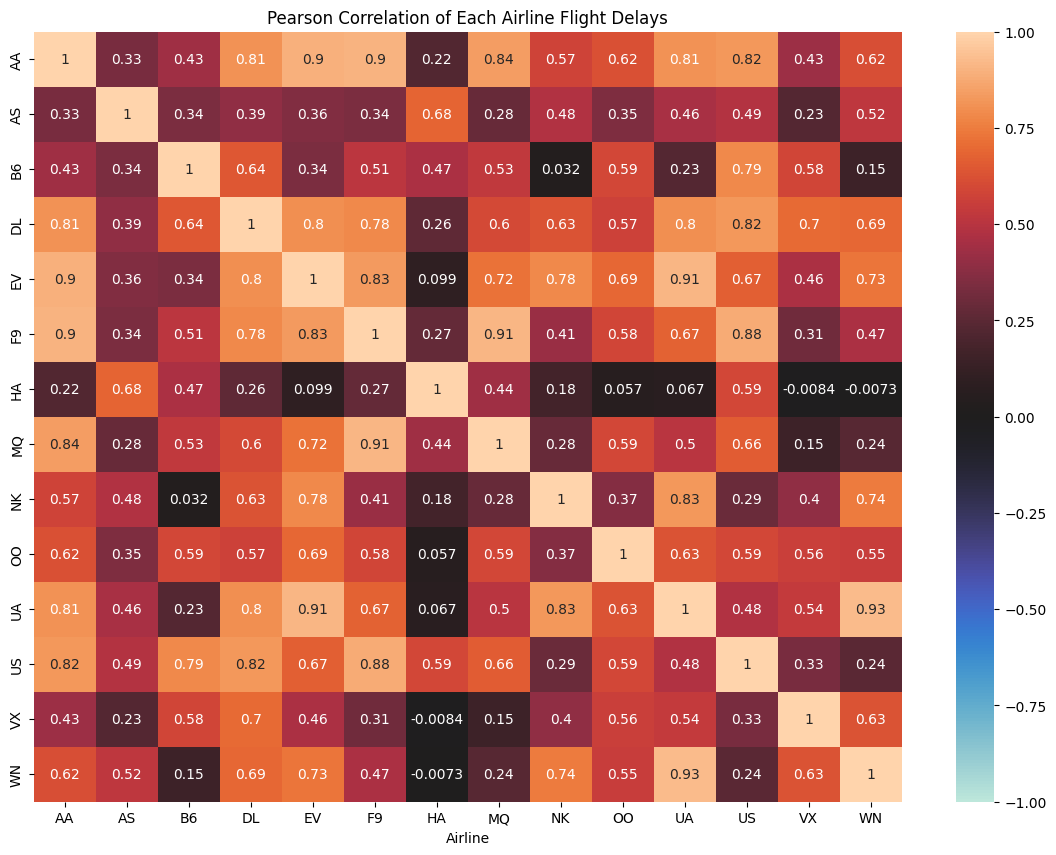

In [57]:
plt.figure(figsize=(14,10))

sns.heatmap(data=flight_corr, vmin=-1, vmax=1, center=0, annot=True)
plt.title("Pearson Correlation of Each Airline Flight Delays")
plt.xlabel("Airline")
plt.show()

Dengan menggunakan heatmap, sekarang terlihat bahwa mana maskapai yang keterlambatannya berkorelasi tinggi dan mana yang rendah. Misal, AA dan EV menghasilkan korelasi yang cukup tinggi positif, yaitu 0.9, yang artinya jika keterlambatan maskapai AA tinggi, begitu juga maskapai EV, dan sebaliknya jika keterlambatan maskapai AA rendah, begitu juga maskapai EV.

Untuk meyakinkan kita dengan hal tersebut, kita dapat lihat pada materi selanjutnya, yaitu Scatter Plot.

### Scatter Plot

Scatter plot biasa digunakan untuk melihat korelasi antara dua fitur bertipe numerik.

Untuk menggunakan scatter plot pada seaborn, kita dapat menggunakan `sns.scatterplot()`, dengan parameter yang sama seperti kita membuat bar plot.

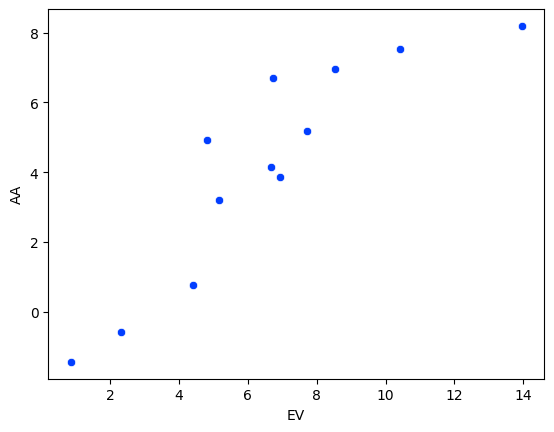

In [58]:
"""
Membuat scatter plot untuk melihat 
keterkaitan pada keterlambatan pesawat
maskapai EV dan AA
"""

sns.scatterplot(data=flight_df, x='EV', y='AA')
plt.show()

Melalui scatter plot di atas, kita dapat semakin yakin bahwa kesimpulan yang kita ambil dengan melihat heatmap sebelumnya benar.

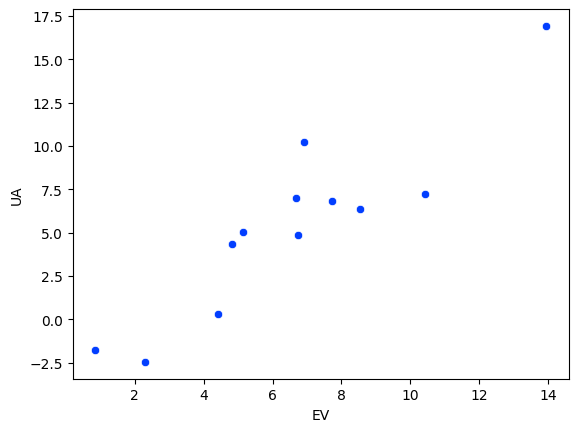

In [59]:
"""
Tambahan scatter plot pada maskapai lain yang
memiliki korelasi tinggi
"""

sns.scatterplot(data=flight_df, x='EV', y='UA')
plt.show()

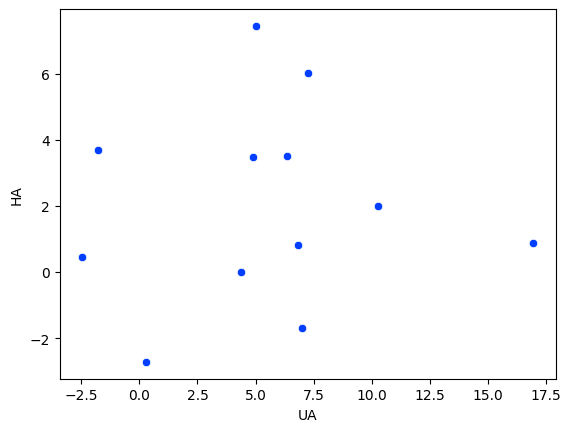

In [60]:
"""
Scatter plot pada maskapai yang memiliki
korelasi rendah (mendekati 0)
"""

sns.scatterplot(data=flight_df, x='UA', y='HA')
plt.show()

Pada heatmap, terlihat bahwa maskapai UA dan HA memiliki korelasi yang rendah, yaitu 0.067. Sehingga, jika kita buat scatter plotnya, menghasilkan plot seperti di atas.

Sekarang kita akan menggunakan dataset lainnya, yaitu insurance.csv yang merupakan data berisi biaya asuransi (charges) beberapa orang.

In [61]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Misal, kita ingin melihat keterkaitan indeks massa tubuh (`bmi`) seseorang dengan biaya asuransi (`charges`) orang tersebut. Sama seperti sebelumnya, kita dapat melakukannya seperti pada code di bawah.

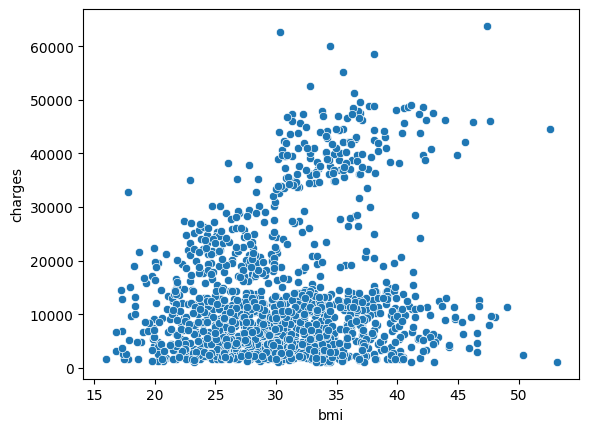

In [62]:
# Mengubah palette menjadi default
sns.set_palette('tab10')
# Membuat scatter plot antara fitur bmi dan charges
sns.scatterplot(data=insurance_df, x='bmi', y='charges')

plt.show()

Scatter plot di atas menunjukkan bahwa korelasi antara `bmi` dan `charges` adalah cenderung positif, tetapi tidak terlalu tinggi. Yang artinya, orang dengan BMI tinggi, cenderung akan membayar biaya asuransi lebih tinggi.

Agar kita semakin yakin dengan kesimpulan tersebut, kita dapat menambahakn garis regresi pada scatter plot tersebut dengan menggunakan `sns.regplot()`.

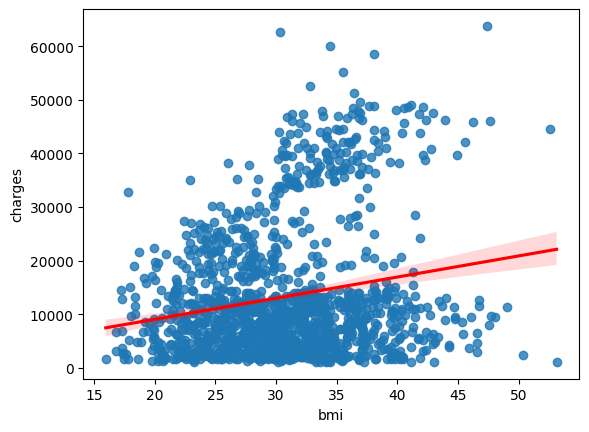

In [63]:
sns.regplot(data=insurance_df, x='bmi', y='charges', line_kws=dict(color="r"))
plt.show()

Berdasarkan scatter plot dan garis regresi dihasilkan, terlihat bahwa kesimpulan yang kita ambil benar. Agar semakin yakin lagi, kita juga dapat menghitung langsung korelasi Pearsonnya menggunakan cara sebelumnya, yaitu pandas `.corr()`.

In [64]:
insurance_df[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


Dengan menggunakan seaborn, kita juga dapat memvisualisasikan scatter plot berdasarkan dengan pewarnaan yang berbeda berdasarkan fitur lainnya yang bertipe kategorik.

Misal, kita ingin membuat scatter plot antara fitur `bmi` dan `charges` dengan pewarnaannya berdasarkan nilai dari fitur `smoker`, yaitu yes atau no. Kita dapat set parameter `hue='smoker'` pada `sns.scatterplot()` seperti pada code di bawah.

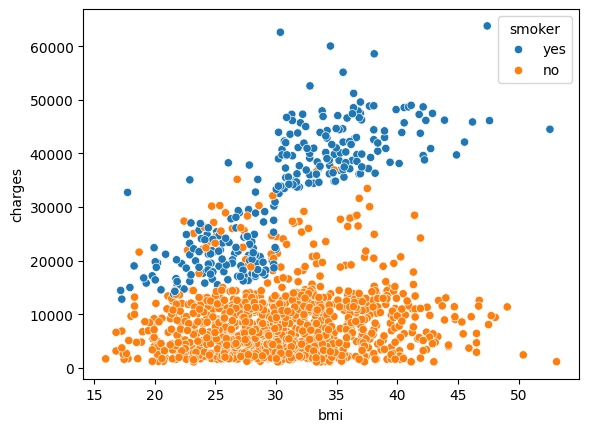

In [65]:
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker')
plt.show()

Sehingga dihasilkan pewarnaan yang berbeda untuk seseorang yang merupakan perokok (biru) dan yang tidak (orange). Berdasarkan scatter plot di atas, terlihat bahwa korelasi antara `bmi` dan `charges` untuk perokok cendering tinggi positif (semakin besar `bmi`, semakin besar juga `charges`). Sedangkan, untuk bukan perokok, korelasinya cenderung rendah (semakin besar `bmi`, tidak terlalu berpengaruh terhadap `charges`).

Seperti cara sebelumnya, kita dapat menambahkan garis regresi. Namun, karena kita disini menggunakan `hue`, terdapat dua cara untuk menambahkan garis regresi, yaitu yang pertama adalah menggunakan `sns.regplot()` seperti di bawah ini.

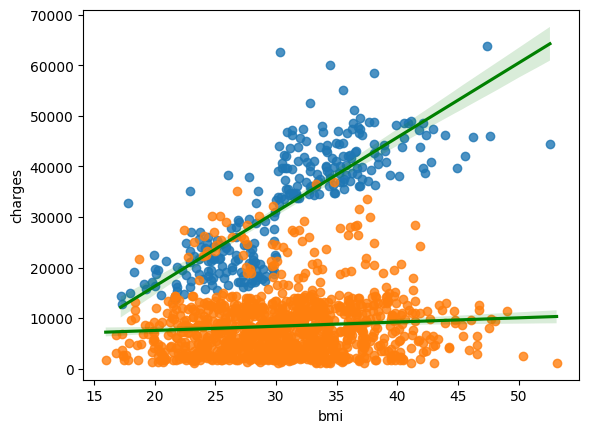

In [66]:
sns.regplot(data=insurance_df.query('smoker == "yes"'), x='bmi', y='charges', line_kws=dict(color="g")) # axes 1
sns.regplot(data=insurance_df.query('smoker == "no"'), x='bmi', y='charges', line_kws=dict(color="g")) # axes 2
plt.show()

Perhatikan bahwa `sns.regplot()` dipanggil dua kali karena fungsi tersebut tidak memiliki parameter `hue`. 

Untuk mempermudah, kita dapat menggunakan cara kedua, yaitu menggunakan `sns.lmplot()`. Cara kerja `sns.lmplot()` yaitu menggabungkan dua (atau lebih) `sns.regplot()` dalam satu figur. 

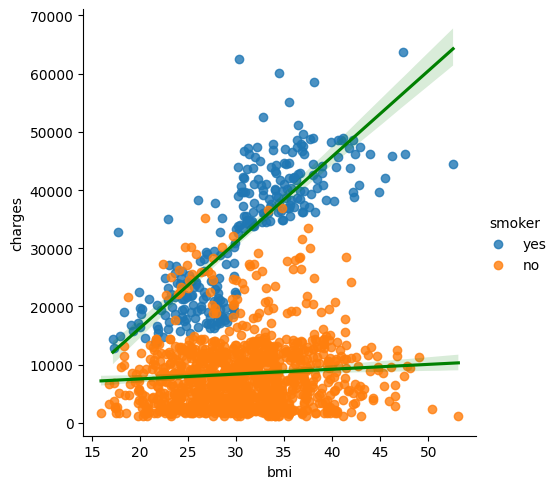

In [67]:
sns.lmplot(data=insurance_df, x='bmi', y='charges', hue='smoker', line_kws=dict(color="g"))
plt.show()

### Box Plot dan Swarm Plot

Box plot dan swarm plot biasa digunakan untuk melihat keterkaitan antara data kategorik dan data numerik. Swarm plot biasa disebut sebagai "categorical scatter plot", karena plot yang dihasilkan mirip seperti scatter plot, tetapi untuk data kategorik.

Untuk menggunakan box plot pada seaborn kita dapat menggunakan `sns.boxplot()`.

Untuk menggunakan swarm plot pada seaborn kita dapat menggunakan `sns.swarmplot()`.

Misal, kita ingin melihat keterkaitan antara fitur `smoker` dan `charges` menggunakan swarm plot. Maka, kita dapat menggunakan code seperti di bawah ini.

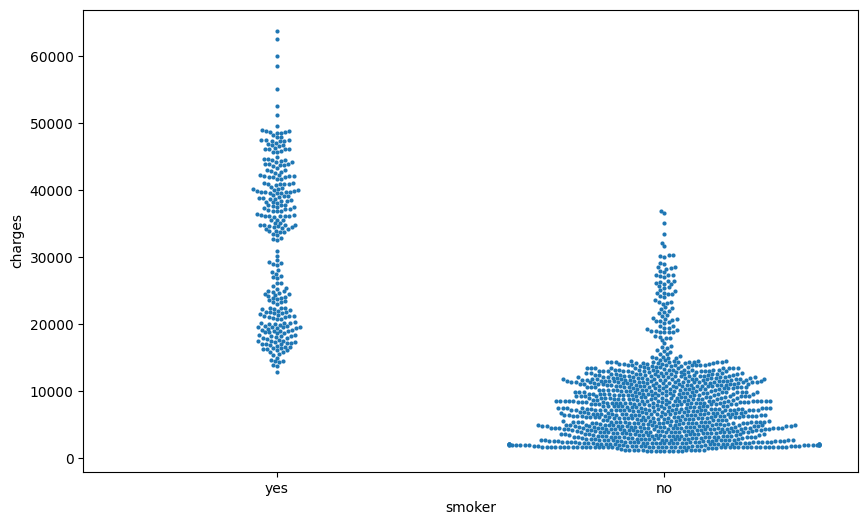

In [68]:
plt.subplots(figsize=(10,6))

sns.swarmplot(data=insurance_df, x='smoker', y='charges', size=3)
plt.show()

Berdasarkan swarm plot di atas, terlihat bahwa perokok cenderung memiliki biaya asuransi yang lebih tinggi dibandingkan yang bukan perokok. Selain itu, semakin lebar "swarm" pada suatu kategori berarti semakin banyak seseorang dengan nilai `charges` tersebut.

Apabila kita ingin menggunakan box plot, maka dapat digunakan code seperti di bawah ini.

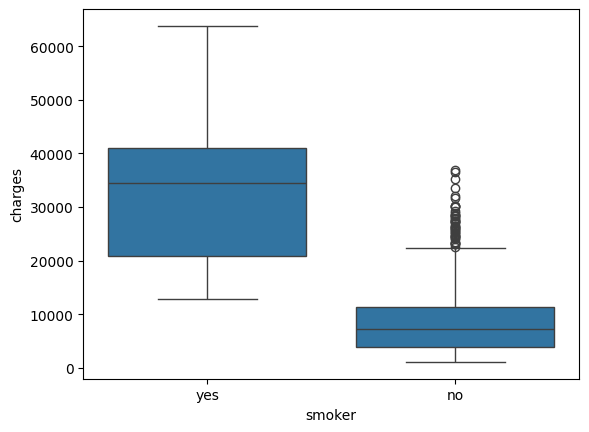

In [69]:
sns.boxplot(data=insurance_df, x='smoker', y='charges')
plt.show()

Pada box plot, terdapat dua istilah yang umum digunakan, yaitu "box" dan "whiskers". Pada box plot di atas, "box" merupakan persegi panjang berwarna biru dan orange. Garis di tengah box merupakan nilai mediannya, serta garis bawah dan garis atas box merupakan kuartil bawah (Q1) dan kuartil atas (Q3) secara berurutan. "Whiskers" adalah garis yang merupakan perpanjangan dari box. Ujung dari whiskers atas adalah Q3 + (1.5 x IQR) data, sedangkan ujung whiskers bawah adalah Q1 - (1.5 x IQR) data.

Titik di luar box dan whiskers tersebut adalah titik yang biasa dijadikan sebagai outlier (penentuan outlier diserahkan ke diri masing-masing, apakah hanya dengan melihat box plot atau dengan menggunakan metode lain, tetapi untuk mempermudah dapat menggunakan box plot).

### Histogram dan Density Plot

Selain box plot dan swarm plot, kita juga dapat melihat persebaran data menggunakan histogram dan density plot. Histogram biasa digunakan untuk melihat persebaran data secara diskrit, sedangkan density plot untuk melihat persebaran data secara kontinu.

Untuk membuat histogram pada seaborn, kita dapat menggunakan `sns.histplot()`.

Untuk membuat density plot pada seaborn, kita dapat menggunakan `sns.kdeplot()`.

Misal, kita ingin melihat persebaran dari fitur `charges` pada insurance_df. Maka dapat digunakan code seperti di bawah.

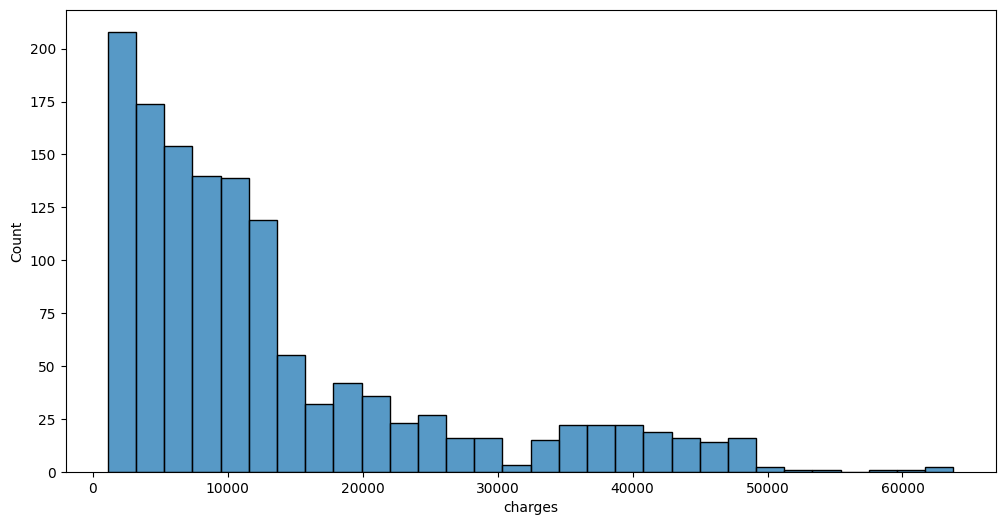

In [70]:
plt.subplots(figsize=(12,6))

sns.histplot(data=insurance_df, x='charges')
plt.show()

Berdasarkan histogram di atas, terlihat bahwa distribusi `charges` cenderung "skew" atau miring ke kanan. "Skewness" atau tingkat kecondongan merupakan aspek yang penting untuk diperhatikan ketika kita ingin membuat model Machine Learning.

Seperti scatter plot, kita juga dapat menentukan pewarnaan histogram berdasarkan fitur lainnya dengan menggunakan parameter `hue` seperti di bawah ini/

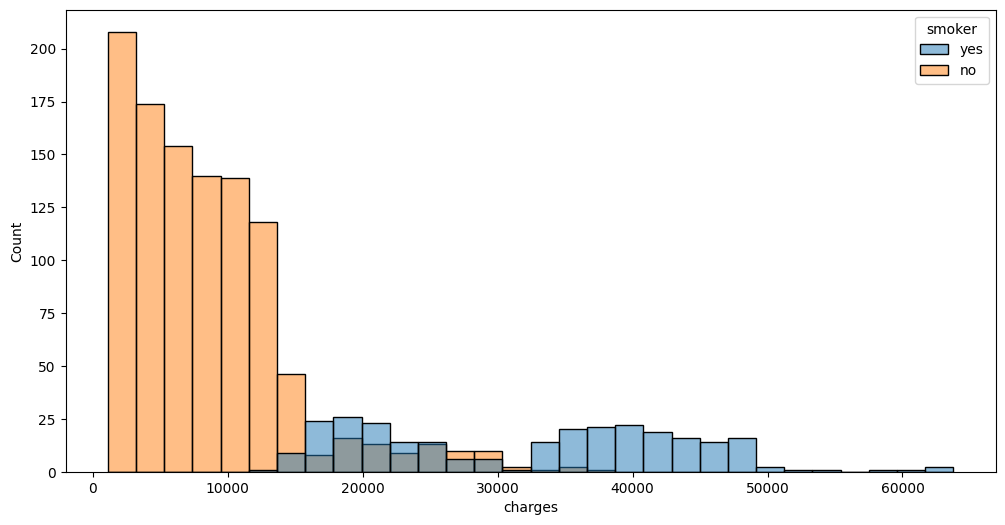

In [71]:
plt.subplots(figsize=(12,6))
sns.histplot(data=insurance_df, x='charges', hue='smoker')
plt.show()

Jika ingin membuat density plot dari fitur `charges`, kita dapat menggunakan kode seperti di bawah ini. Parameter `shade` berfungsi untuk memberikan warna di bawah kurva.

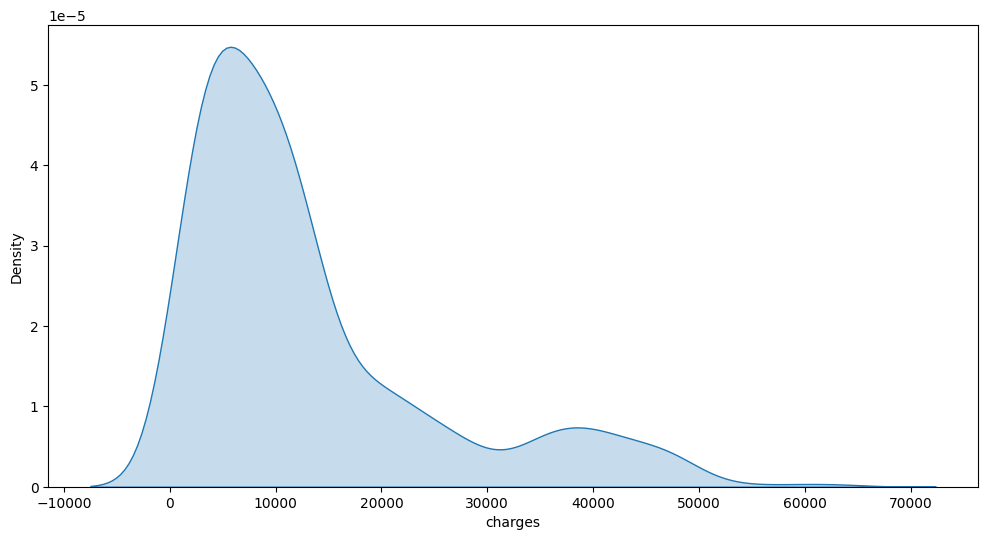

In [72]:
plt.subplots(figsize=(12,6))
sns.kdeplot(data=insurance_df, x='charges', fill=True)
plt.show()

`sns.kdeplot()` juga dapat menggunakan parameter `hue`.

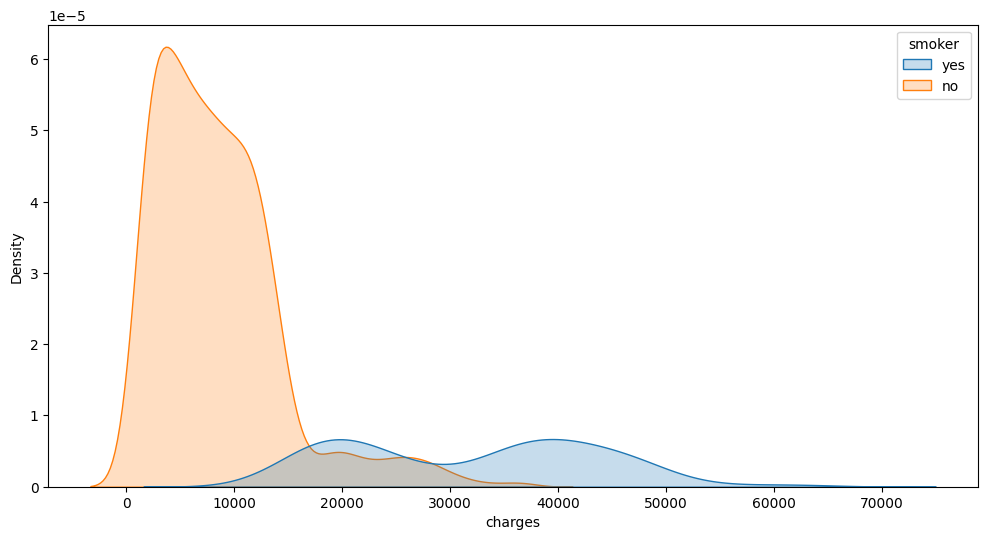

In [73]:
plt.subplots(figsize=(12,6))
sns.kdeplot(data=insurance_df, x='charges',
            hue='smoker', fill=True)
plt.show()

Apabila kita ingin menggabungkan histogram dan density plot dalam satu figur, kita dapat menggunakan `sns.histplot()` dengan parameter `kde=True`.

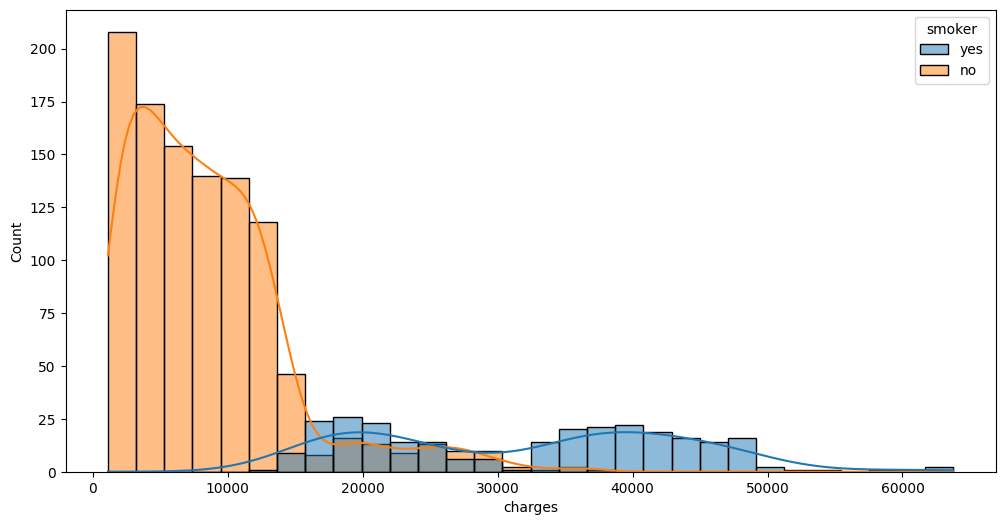

In [74]:
plt.subplots(figsize=(12,6))
sns.histplot(data=insurance_df, x='charges', hue='smoker', kde=True)
plt.show()

### Joint Plot

Pada seaborn, kita juga dapat membuat dua plot yang berbeda dari dua fitur dalam satu figur yang sama menggunakan `sns.jointplot()`.

Jenis plot yang dihasilkan dapat diatur pada parameter `kind`. Pilihan jenis `kind` yang disediakan dapat dilihat pada:

<https://seaborn.pydata.org/generated/seaborn.jointplot.html>

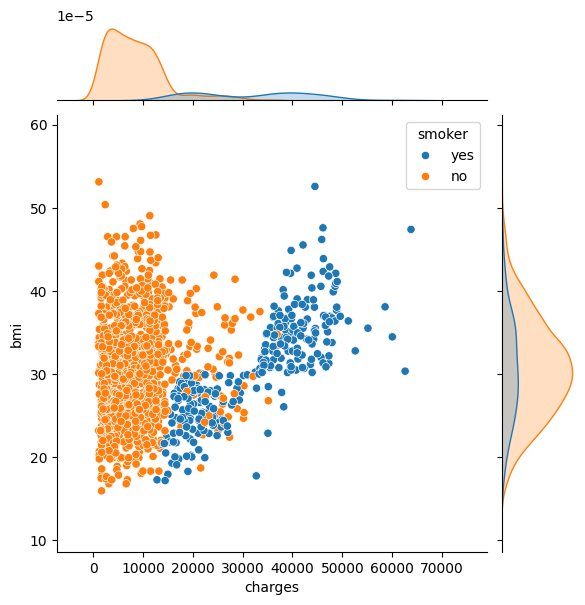

In [75]:
sns.jointplot(data=insurance_df, x='charges', y='bmi', hue='smoker', kind="scatter")

plt.show()

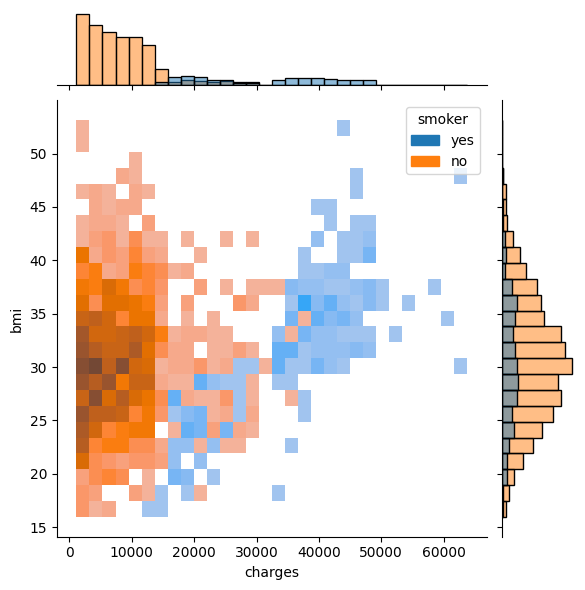

In [76]:
sns.jointplot(data=insurance_df, x='charges', y='bmi', hue='smoker', kind="hist")

plt.show()

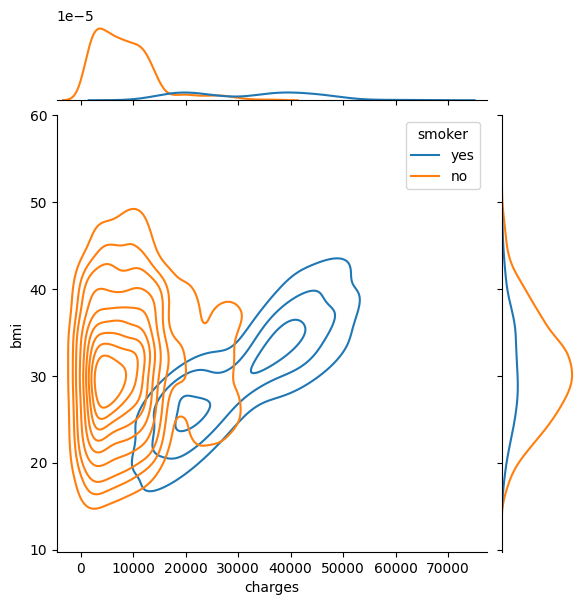

In [77]:
sns.jointplot(data=insurance_df, x='charges', y='bmi', hue='smoker', kind="kde")

plt.show()

## Panduan Pemilihan Plot

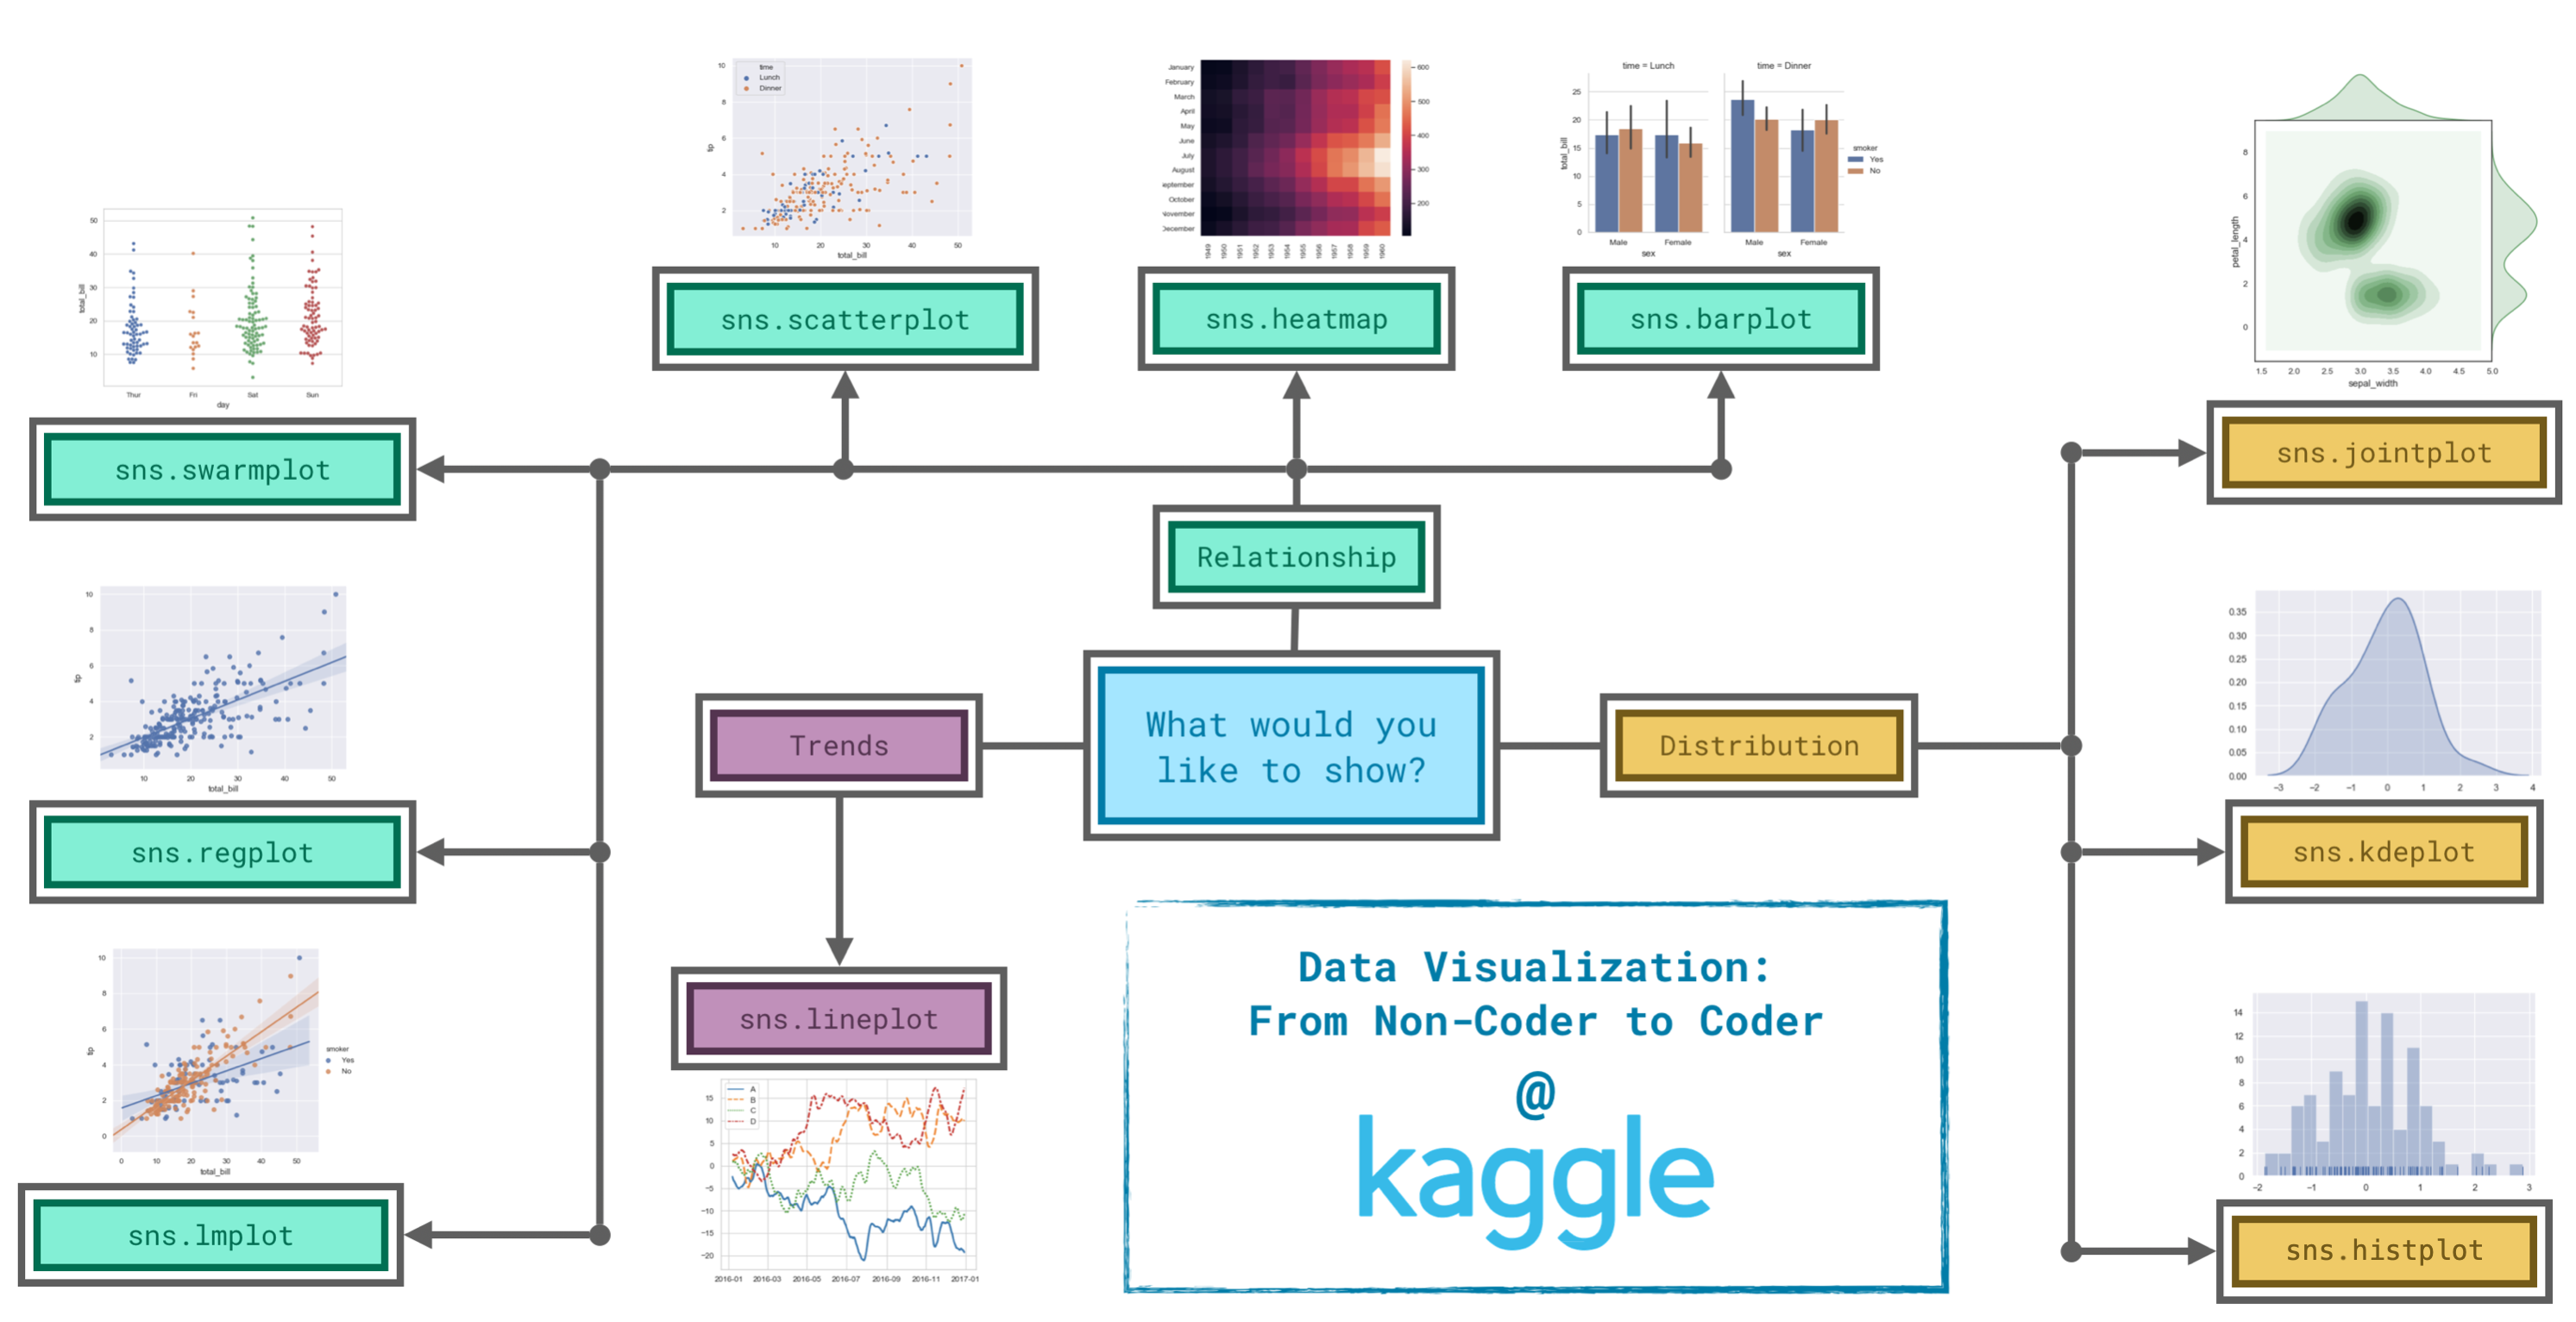

source: <https://www.kaggle.com/code/alexisbcook/choosing-plot-types-and-custom-styles>

# Encoding Data Kategorik


Banyak metode sains data / *machine learning* yang hanya bisa digunakan dengan data numerik. Oleh karena itu, data kategorik perlu diubah terlebih dahulu menjadi data numerik, melakukan yang namanya *categorical data encoding*

Ingat kembali, data kategorik adalah suatu tipe data yang merepresentasikan kelompok atau kategori. Data bertipe ini dapat diklasifikasikan menjadi dua jenis utama: nominal dan ordinal.

1.  Data nominal adalah tipe data kategorik di mana kategori tidak memiliki urutan atau hierarki yang bermakna. Setiap kategori hanya mewakili suatu label tanpa adanya perbedaan kuantitatif atau tingkatan di antara kategori tersebut.

    Ciri-ciri Data Nominal:
    -  Tidak memiliki urutan atau skala tertentu.
    - Hanya sebagai label atau nama tanpa makna numerik.
    - Bisa berupa teks atau angka, tetapi angka hanya digunakan sebagai kode, bukan untuk perhitungan.

2. Data ordinal adalah tipe data kategorik di mana kategori memiliki urutan atau hierarki yang jelas. Meskipun memiliki urutan, jarak antar kategori tidak selalu sama.

    Ciri-ciri Data Ordinal:
    - Memiliki urutan yang jelas (ada tingkatan).
    - Tidak bisa dihitung perbedaan antar tingkatan secara numerik.
    - Bisa diurutkan tetapi tidak bisa dioperasikan secara matematis (misalnya, tidak bisa dijumlahkan atau dikurangi).

Kedua jenis data kategorik ini memiliki cara encoding yang berbeda.

Dataset yang akan digunakan adalah "California Housing Prices" (housing.csv) yang bisa didownload dari salah satu sumber berikut:

* [Direct link (langsung dari GitHub Pages ini)](./housing.csv)

* Kaggle: <https://www.kaggle.com/datasets/camnugent/california-housing-prices>

In [78]:
df_housing = pd.read_csv("./housing.csv")

mari kita lihat isinya

In [79]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [80]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Ada satu data kategorik, yaitu `ocean_proximity`. Mari kita liat jenis-jenisnya (kategorinya):

In [81]:
df_housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Perhatikan bahwa data kategorik tersebut berisi nilai-nilai yang tidak memiliki urutan atau skala, sehingga data kategorik tersebut merupakan data nominal

Selanjutnya cek, apakah ada missing value?

In [82]:
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [83]:
df_housing[df_housing["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Perhatikan bahwa tipe datanya adalah `int64` atau bilangan bulat.

Dari 20640 baris, ada satu kolom/fitur (`total_bedrooms`) dengan 207 missing value.

## Encoding Data Nominal dengan One-Hot Encoding

Metode yang sering digunakan untuk melakukan encoding data nominal adalah *one hot encoding*. Misalnya ada satu fitur kategorik dengan $n$ kemungkinan data, bernama $D_i$ untuk $i = 1, 2, \dots, n$. Maka fitur tersebut diganti dengan $n$ kolom baru, misal bernama $K_i$ untuk $i = 1, 2, \dots, n$, di mana pada kolom ke-i, isinya adalah

* $1$, apabila data aslinya pada baris tersebut adalah $D_i$
* $0$ apabila bukan $D_i$

In [84]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
encoder = OneHotEncoder()

In [86]:
hasil_onehot = encoder.fit_transform(df_housing[["ocean_proximity"]])

In [87]:
print(encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [88]:
print(encoder.categories_[0])

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [89]:
kolom_encoding = list(encoder.categories_[0])

In [90]:
onehot_array = hasil_onehot.toarray()

In [91]:
print(onehot_array)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [92]:
onehot_df = pd.DataFrame(onehot_array, columns=kolom_encoding)

In [93]:
onehot_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


Setelah dilakukan one-hot encoding, gabungkan dataframenya dengan dataframe awal

In [94]:
df_housing = pd.concat([df_housing, onehot_df], axis=1)

In [95]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.0,1.0,0.0,0.0,0.0


In [96]:
df_housing = df_housing.drop(["ocean_proximity"], axis=1)

In [97]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


## Encoding Data Ordinal dengan Label Encoding & Ordinal Encoding (TODO)

Untuk melakukan encoding data ordinal, terdapat dua metode, yaitu menggunakan label encoding dan ordinal encoding. Secara matematis, keduanya cukup serupa. Misalkan ada satu fitur kategorik $D$ dengan $n$ data, atau dapat ditulis sebagai himpunan $C={c_1, c_2, ..., c_n} $. Kemudian misalkan $D=\{d_1, d_2, ..., d_k\}$ subhimpunan dari $C$ yang hanya berisi data unik. Label encoding dan ordinal encoding akan memetakan setiap elemen di $C$ ke bilangan asli jika label data ke-$i$ di $C$ sama dengan label data ke-$i$ di $D$, atau didefinisikan fungsi $f:D\rightarrow \mathbb{N}$ dengan

$$
    f(c_i)=f(d_i)=i, \hspace{5mm}\text{ jika } c_i=d_i, i=0,1,...,n
$$

Namun perbedaan dari keduanya adalah:
- label Encoding: tidak memerhatikan urutan tiap label. Sehingga sebenarnya data nominal bisa saya dilakukan label encoding.
- Ordinal Encoding: memerhatikan urutan tiap label. yaitu jika $c_i<c_j$ maka $f(c_i)<f(c_j)$.

In [98]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

Disini kita akan menggunakan dataset flight delay sebelumnya

In [109]:
flight_df = flight_df.reset_index()

In [110]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   12 non-null     object 
 1   AA      12 non-null     float64
 2   AS      12 non-null     float64
 3   B6      12 non-null     float64
 4   DL      12 non-null     float64
 5   EV      12 non-null     float64
 6   F9      12 non-null     float64
 7   HA      12 non-null     float64
 8   MQ      12 non-null     float64
 9   NK      12 non-null     float64
 10  OO      12 non-null     float64
 11  UA      12 non-null     float64
 12  US      6 non-null      float64
 13  VX      12 non-null     float64
 14  WN      12 non-null     float64
dtypes: float64(14), object(1)
memory usage: 1.5+ KB


Perhatikan bahwa fitur Month merupakan fitur yang kategorik. Bulan bisa kita anggap memiliki keterurutan atau tidak tergantung konteks datanya. Disini kita coba saja lakukan encoding untuk mempraktikan cara menggunakan encoder 

In [192]:
urutan_bulan = [list(flight_df["Month"])]
print(urutan_bulan)

[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]


In [193]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=urutan_bulan)

In [195]:
flight_df["Month_Label"] = label_encoder.fit_transform(flight_df["Month"])
flight_df["Month_ordinal"] = ordinal_encoder.fit_transform(flight_df[["Month"]])

In [196]:
flight_df

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,Month_Label,Month_ordinal
0,January,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466,4,0.0
1,February,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363,3,1.0
2,March,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341,7,2.0
3,April,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399,0,3.0
4,May,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777,8,4.0
5,June,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462,6,5.0
6,July,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942,5,6.0
7,August,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108,1,7.0
8,September,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260,11,8.0
9,October,-0.580930,-2.993617,3.676787,-5.011516,2.303760,0.082127,0.467074,-3.735054,6.810736,1.750897,-2.456542,NaN,2.254278,-0.688851,10,9.0


Dapat dilihat hasil dari label encoding dan ordinal encoding berbeda. Pada label encoding, kita tidak bisa mengatur urutan secara manual. Urutan angka hasil label encoding ditentukan berdasarkan urutan alphabet dari nilai pada fitur yang di encoding. Contohnya bulan "April" dipetakan ke nilai 0, "August" dipetakan ke nilai 1, dsb. Sedangkan pada ordinal encoding, kita bisa menentukan urutannya terlebih dahulu menggunakan list, namun perlu diperhatikan bahwa hasil petanya dimulai dari nol, sehingga bulan "January" = 0, "February" = 1, dst. 

Bisa dibilang kedua metode tersebut tidak cocok untuk melakukan encoding pada kolom bulan yang indeksnya dimulai dari satu, namun jika data yang dimiliki tidak peduli indeksnya (hanya perlu diubah ke bentuk numerik berdasarkan urutan), metode ordinal encoding sudah sangat cocok untuk digunakan.

Jika kita ingin melakukan pelabelan secara manual bisa dilakukan dengan menggunakan method `.map()`

In [197]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

flight_df["Month_Map"] = flight_df["Month"].map(month_mapping)

In [198]:
flight_df

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,Month_Label,Month_ordinal,Month_Map
0,January,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466,4,0.0,1
1,February,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363,3,1.0,2
2,March,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341,7,2.0,3
3,April,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399,0,3.0,4
4,May,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777,8,4.0,5
5,June,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462,6,5.0,6
6,July,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942,5,6.0,7
7,August,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108,1,7.0,8
8,September,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260,11,8.0,9
9,October,-0.580930,-2.993617,3.676787,-5.011516,2.303760,0.082127,0.467074,-3.735054,6.810736,1.750897,-2.456542,NaN,2.254278,-0.688851,10,9.0,10


# Mengatasi Missing Value dengan Metode Imputasi

Pada dataset `df_housing`, banyaknya *missing value* relatif sedikit, sebenarnya tidak masalah apabila baris-baris tersebut cukup dihapus saja. Namun, kita akan gunakan untuk mempelajari metode imputasi.

## Median

In [94]:
df_fill_median = df_housing.copy()

In [95]:
df_housing["total_bedrooms"].median()

435.0

In [96]:
bedrooms_median = df_housing["total_bedrooms"].median()
print(bedrooms_median)

435.0


In [97]:
df_fill_median["total_bedrooms"] = df_fill_median["total_bedrooms"].fillna(bedrooms_median)

In [98]:
df_fill_median.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Cara lain, menggunakan scikit-learn:

In [100]:
df_fill_median2 = df_housing.copy()

In [101]:
from sklearn.impute import SimpleImputer

In [102]:
median_imputer = SimpleImputer(
    missing_values=np.nan, strategy='median'
)

In [103]:
df_fill_median2[["total_bedrooms"]] = median_imputer.fit_transform(
    df_fill_median2[["total_bedrooms"]]
)

In [104]:
df_fill_median2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

## Modus

In [105]:
df_fill_mode = df_housing.copy()

In [106]:
df_housing["total_bedrooms"].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [107]:
df_housing["total_bedrooms"].mode()[0]

280.0

In [108]:
bedrooms_mode = df_housing["total_bedrooms"].mode()[0]
print(bedrooms_mode)

280.0


In [109]:
df_fill_mode["total_bedrooms"] = df_fill_mode["total_bedrooms"].fillna(bedrooms_mode)

In [110]:
df_fill_mode.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Cara lain, menggunakan scikit-learn:

In [111]:
df_fill_mode2 = df_housing.copy()

In [112]:
mode_imputer = SimpleImputer(
    missing_values=np.nan, strategy='most_frequent'
)

In [113]:
df_fill_mode2[["total_bedrooms"]] = mode_imputer.fit_transform(
    df_fill_mode2[["total_bedrooms"]]
)

In [114]:
df_fill_mode2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

## Mean

In [115]:
df_fill_mean = df_housing.copy()

In [116]:
df_fill_mean["total_bedrooms"].mean()

537.8705525375618

In [117]:
np.round(df_fill_mean["total_bedrooms"].mean())

538.0

In [118]:
bedrooms_mean = np.round(df_fill_mean["total_bedrooms"].mean())
print(bedrooms_mean)

538.0


In [119]:
df_fill_mean["total_bedrooms"] = df_fill_mean["total_bedrooms"].fillna(bedrooms_mean)

In [120]:
df_fill_mean.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Cara lain, menggunakan scikit-learn:

In [121]:
df_fill_mean2 = df_housing.copy()

In [122]:
mean_imputer = SimpleImputer(
    missing_values=np.nan, strategy='mean'
)

In [123]:
df_fill_mean2[["total_bedrooms"]] = mean_imputer.fit_transform(
    df_fill_mean2[["total_bedrooms"]]
)

In [124]:
df_fill_mean2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

## KNN Imputer

In [125]:
from sklearn.impute import KNNImputer

In [126]:
knn_imputer = KNNImputer(n_neighbors=3)

In [128]:
df_fill_knn = df_housing.copy()

KNN Imputer memerlukan kolom-kolom lainnya sebagai acuan, dan hanya bisa bekerja dengan data numerik. Sehingga, kita perlu mem-filter terlebih dahulu kolom-kolom numerik dari dataset kita.

In [129]:
df_fill_knn.select_dtypes(include='number')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [131]:
num_col = df_fill_knn.select_dtypes(include='number').columns
print(num_col)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')


In [132]:
df_fill_knn[num_col] = knn_imputer.fit_transform(df_fill_knn[num_col])

In [133]:
df_fill_knn.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

## Perbandingan Metode Imputasi

Kita bisa membandingkan beberapa metode imputasi (dan memilih yang mana yang terbaik) dengan langkah-langkah berikut.

1. Gunakan sample dari dataset awal yang tidak mengandung missing data (Sample data ini akan menjadi ground truth).
2. Perkenalkan proporsi data hilang yang meningkat secara acak (contoh 5–50 % dengan kenaikan data hilang 5%).
3. Lakukan metode imputasi dengan metode-metode yang ingin di bandingkan.
4. Hitung jumlahan error kuadrat antara data yang dilakukan imputasi dan data original, untuk setiap metode, dan setiap proporsi data yang hilang.

Langkah pertama, kita perlu memperoleh sample dari dataset kita yang tidak mengandung *missing value*, yang bisa disebut *ground truth*. Cara termudah adalah dengan menghapus baris-baris yang memiliki *missing value* (biasanya dipilih lagi sample hanya sebagian baris, tapi di sini tidak kita lakukan):

In [134]:
df_ground_truth = df_housing.dropna()

In [136]:
df_ground_truth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  float64
 10  INLAND              20433 non-null  float64
 11  ISLAND              20433 non-null  float64
 12  NEAR BAY            20433 non-null  float64
 13  NEAR OCEAN          20433 non-null  float64
dtypes: float64(14)
memory usage: 2.3 MB


Selanjutnya, kita perlu membolong-bolongi dataset ini, agar sekian persen diisi *missing value*.

In [137]:
import random

In [138]:
def missing_value_generator(df_original, percentage):
    df_miss = df_original.copy()
    baris, kolom = df_miss.shape
    n_total = baris*kolom

    permutasi = list(range(n_total))
    random.shuffle(permutasi)

    n_pilih = int(percentage * n_total)
    pilihan = permutasi[0 : n_pilih]

    for p in pilihan:
        df_miss.iloc[ int(p/kolom), p%kolom ] = np.nan
    
    return df_miss

In [139]:
df_miss_5 = missing_value_generator(df_housing, 0.05)

In [140]:
df_miss_5.isna().sum()

longitude             1112
latitude              1032
housing_median_age    1051
total_rooms           1005
total_bedrooms        1170
population            1000
households            1026
median_income         1052
median_house_value    1021
<1H OCEAN             1041
INLAND                1066
ISLAND                1036
NEAR BAY              1020
NEAR OCEAN            1018
dtype: int64

In [141]:
def compare_imputation(df_ground_truth, methods, percentages):
    list_missing_df = []
    for percent in percentages:
        df_miss = missing_value_generator(df_ground_truth, percent)
        list_missing_df.append(df_miss)

    all_results = []
    for method in methods:
        method_results = []
        for df_miss in list_missing_df:
            df_imputed = method.fit_transform(df_miss)
            SSE = ((df_ground_truth - df_imputed)**2).sum().sum()
            method_results.append(SSE)
        all_results.append(method_results)

    return all_results

In [142]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [143]:
list_persen = [0.05, 0.10, 0.15, 0.20, 0.25]

In [144]:
all_results = compare_imputation(
    df_ground_truth,
    [median_imputer, mean_imputer, mode_imputer],
    list_persen
)

In [145]:
all_results

[[13472556117040.742,
  29200125925218.32,
  44888219322432.08,
  58760057941823.1,
  71218852004932.02],
 [12893394505105.559,
  27585393139970.81,
  42959166785142.76,
  55771678195422.18,
  67446611118587.484],
 [98136114329477.44,
  203833066224326.94,
  320455690937897.0,
  406196187048687.2,
  505507295952070.3]]

In [146]:
print("Median:", all_results[0])
print("Mean:", all_results[1])
print("Mode:", all_results[2])

Median: [13472556117040.742, 29200125925218.32, 44888219322432.08, 58760057941823.1, 71218852004932.02]
Mean: [12893394505105.559, 27585393139970.81, 42959166785142.76, 55771678195422.18, 67446611118587.484]
Mode: [98136114329477.44, 203833066224326.94, 320455690937897.0, 406196187048687.2, 505507295952070.3]


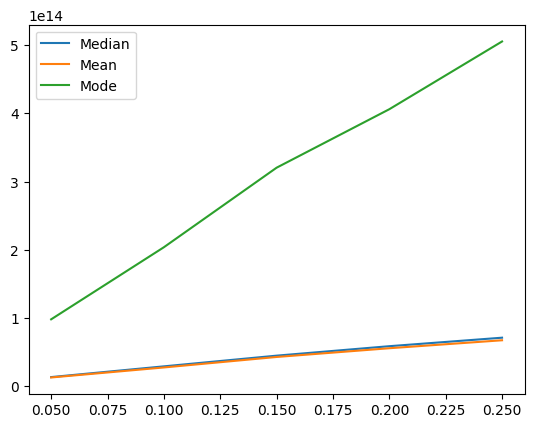

In [147]:
plt.plot(list_persen, all_results[0])
plt.plot(list_persen, all_results[1])
plt.plot(list_persen, all_results[2])
plt.legend(["Median", "Mean", "Mode"])
plt.show()

Dari hasil tersebut, didapat bahwa secara keseluruhan, untuk setiap persentase missing values, metode imputasi dengan menggunakan mean menghasilkan SSE yang terkecil dibandingkan imputasi dengan median dan modus. Oleh karena itu, kita akan menggunakan metode imputasi menggunakan mean untuk mengisi missing value pada kolom "total_bedrooms" dari df asli.

In [148]:
# melihat kembali df awal
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [149]:
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [152]:
# lakukan imputasi dengan metode terbaik yg telah didapat, yaitu dengan mean

df_housing[['total_bedrooms']] = mean_imputer.fit_transform(df_housing[['total_bedrooms']] )

In [153]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [155]:
df_housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

## Export Dataframe yang telah diimputasi ke CSV

In [ ]:
df_housing.to_csv("housing_modified.csv")